In [17]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data = pd.read_csv("Z:\\Sasindu\\Access Training\\SQL cleaned data\\cleaned_weather_data.csv" )

In [19]:
df = pd.DataFrame(data)

In [20]:
df.head()

,FX,FM,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,UPDATED_DATE
0,NaN,NaN,0.0,1,NaN,0.0,NaN,NaN,NaN,14.0,NaN,1954-06-01
1,NaN,NaN,0.5,1,NaN,0.0,NaN,NaN,NaN,13.2,NaN,1954-06-02
2,NaN,NaN,0.0,1,NaN,0.0,NaN,NaN,NaN,16.6,NaN,1954-06-03
3,NaN,NaN,1.2,1,NaN,0.0,NaN,NaN,NaN,15.2,NaN,1954-06-04
4,NaN,NaN,6.0,1,NaN,0.0,NaN,NaN,NaN,15.2,NaN,1954-06-05


In [21]:
df.shape

(25051, 12)

In [22]:
df.describe()

,FX,FM,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM
count,13793.000000,13809.000000,25051.000000,25051.000000,24746.000000,23484.000000,13860.000000,13874.000000,13874.000000,25051.000000,13874.000000
mean,9.452258,2.577739,2.627951,2.686679,4.883254,1.013328,5.277778,9.558238,955.134064,9.612083,73.309500
std,4.297915,1.304984,5.911350,2.880991,4.389391,3.663570,2.406916,4.070129,7.512486,7.908055,13.350476
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,913.000000,-20.000000,20.000000
25%,6.000000,2.000000,0.000000,0.000000,1.000000,0.000000,4.000000,6.000000,951.000000,3.400000,64.000000
50%,8.000000,2.000000,0.000000,1.000000,4.000000,0.000000,6.000000,9.000000,956.000000,9.900000,74.000000
75%,12.000000,3.000000,2.600000,6.000000,8.000000,0.000000,7.000000,13.000000,960.000000,15.800000,84.000000
max,39.000000,11.000000,101.600000,8.000000,16.000000,55.000000,8.000000,22.000000,980.000000,30.400000,100.000000


In [23]:
df.isnull().sum()

FX              11258
FM              11242
RSK                 0
RSKF                0
SDK               305
SHK_TAG          1567
NM              11191
VPM             11177
PM              11177
TMK                 0
UPM             11177
UPDATED_DATE        0
dtype: int64

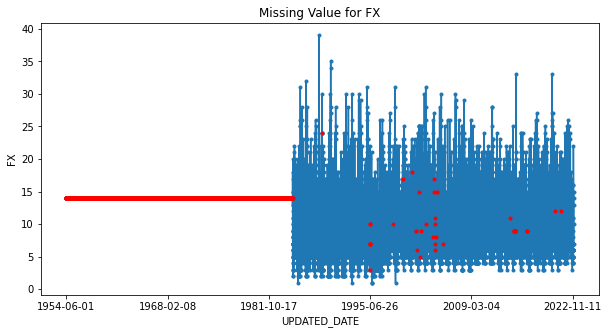

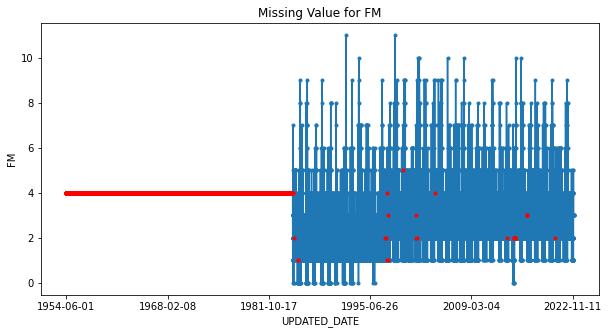

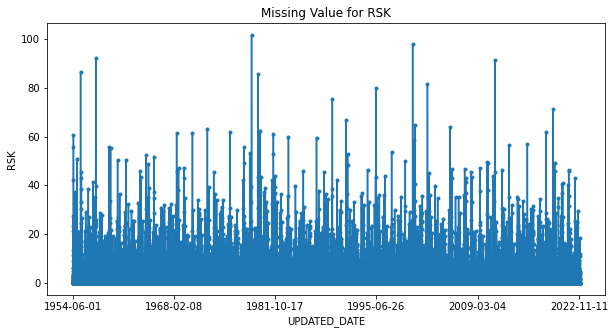

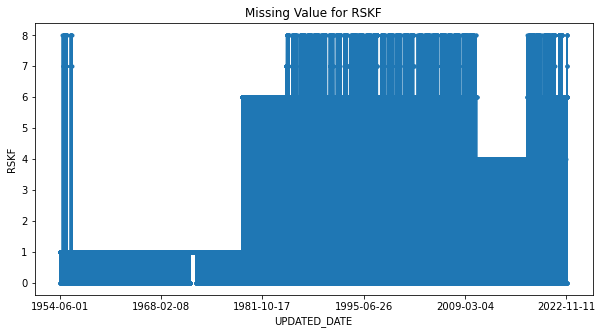

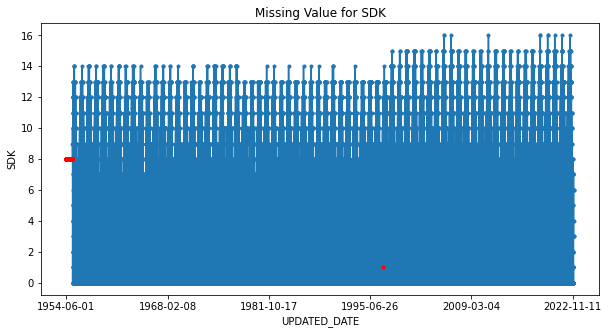

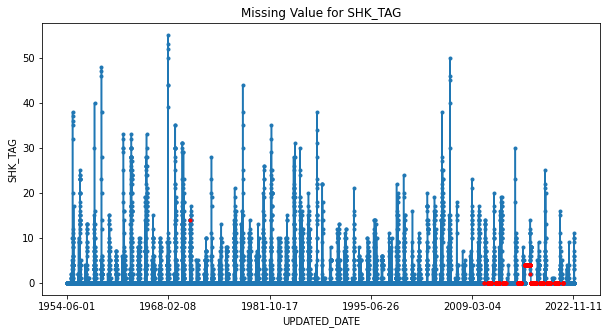

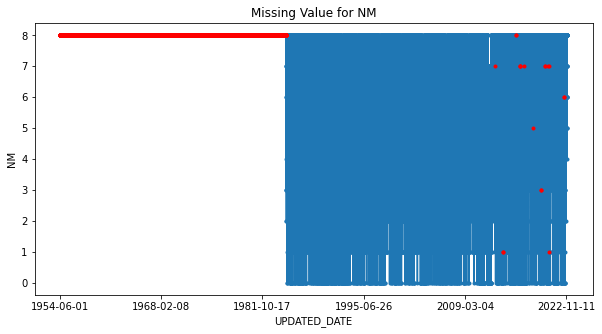

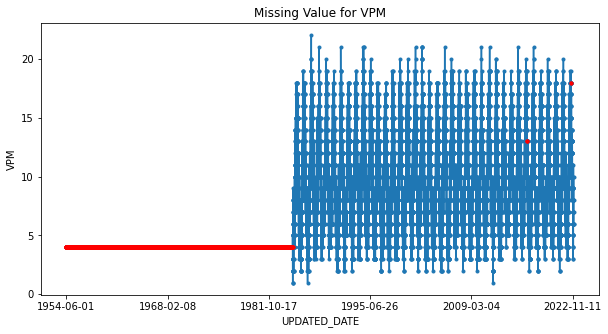

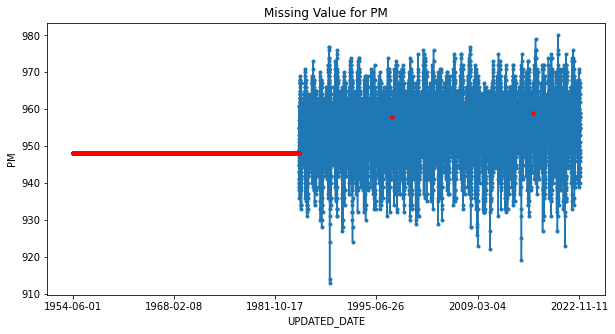

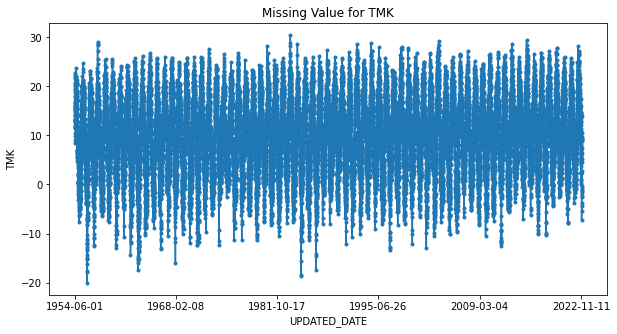

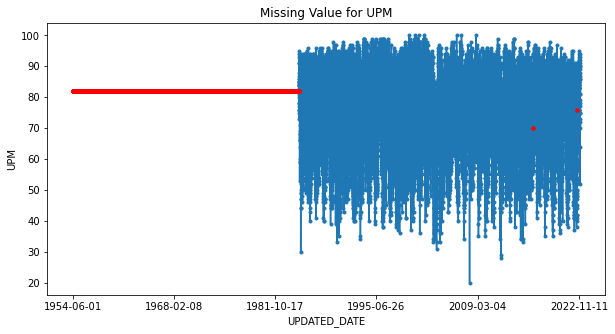

In [24]:
missing_cols = ['UPDATED_DATE','FX','FM','RSK','RSKF','SDK','SHK_TAG','NM','VPM','PM','TMK','UPM']

for idx,column in enumerate(missing_cols):
    if column != 'UPDATED_DATE':
        bfm = df[['UPDATED_DATE', column]]
        bfm.set_index('UPDATED_DATE',inplace=True)
        bfm_imputed = bfm.fillna(method='bfill')
        ax = bfm_imputed.plot(linestyle = "-",marker=".",figsize=[10,5])
        bfm_imputed[bfm.isnull()].plot(ax=ax,marker =".",legend='Test',color='r')
        ax.set_title(f'Missing Value for {column}')
        ax.set_ylabel(f'{column}')
        ax.get_legend().remove()

In [25]:
df.loc[(data['UPDATED_DATE'] > '1984-12-28') & (data['UPDATED_DATE'] < '1985-01-03')]

,FX,FM,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,UPDATED_DATE
11169,NaN,NaN,1.1,6,0.0,0.0,NaN,NaN,NaN,-2.3,NaN,1984-12-29
11170,NaN,NaN,2.4,6,1.0,2.0,NaN,NaN,NaN,-3.2,NaN,1984-12-30
11171,NaN,NaN,0.1,6,0.0,5.0,NaN,NaN,NaN,-6.6,NaN,1984-12-31
11172,14.0,4.0,1.2,7,0.0,5.0,8.0,4.0,948.0,-2.4,82.0,1985-01-01
11173,14.0,4.0,4.5,7,0.0,8.0,8.0,5.0,939.0,-4.0,94.0,1985-01-02


In [26]:
dfN = df.loc[(data['UPDATED_DATE'] >= '1985-01-01')]

In [27]:
dfN.head()

,FX,FM,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,UPDATED_DATE
11172,14.0,4.0,1.2,7,0.0,5.0,8.0,4.0,948.0,-2.4,82.0,1985-01-01
11173,14.0,4.0,4.5,7,0.0,8.0,8.0,5.0,939.0,-4.0,94.0,1985-01-02
11174,13.0,4.0,1.5,7,0.0,19.0,7.0,3.0,945.0,-6.8,83.0,1985-01-03
11175,18.0,4.0,4.3,7,3.0,21.0,6.0,3.0,940.0,-9.5,88.0,1985-01-04
11176,6.0,2.0,1.3,7,1.0,26.0,8.0,2.0,945.0,-11.4,86.0,1985-01-05


In [28]:
new_missing_values = dfN.isnull().sum()
print(new_missing_values)

FX                86
FM                70
RSK                0
RSKF               0
SDK                1
SHK_TAG         1566
NM                19
VPM                5
PM                 5
TMK                0
UPM                5
UPDATED_DATE       0
dtype: int64


In [29]:
# Filling missing values using back filling method.
new_missing_cols = ['FX','FM','SDK','SHK_TAG','NM','VPM','PM','UPM']

In [30]:
for col in new_missing_cols:
    dfN[col]=dfN[col].fillna(method='bfill')

C:\Users\Maclan\AppData\Local\Temp\ipykernel_1392\176726807.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfN[col]=dfN[col].fillna(method='bfill')


In [31]:
new_missing_values = dfN.isnull().sum()
print(new_missing_values)

FX              0
FM              0
RSK             0
RSKF            0
SDK             0
SHK_TAG         0
NM              0
VPM             0
PM              0
TMK             0
UPM             0
UPDATED_DATE    0
dtype: int64


## EDA

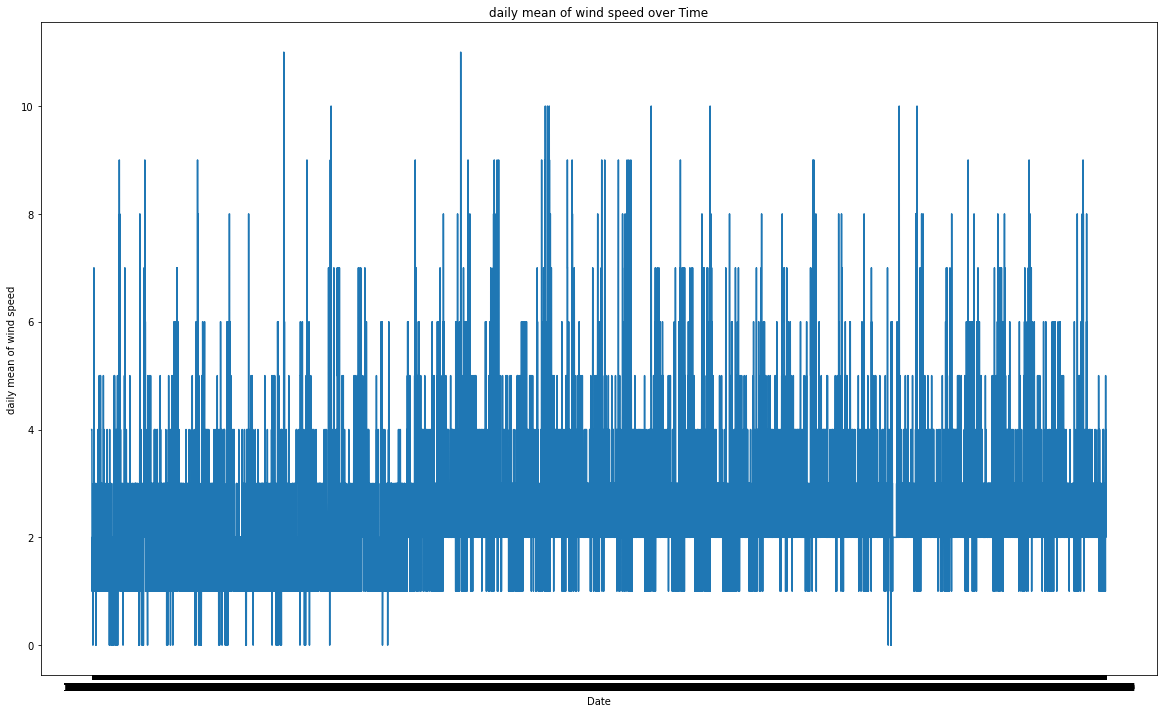

In [32]:
plt.figure(figsize=(20,12))
sns.lineplot(data=dfN,x='UPDATED_DATE',y='FM')
plt.xlabel("Date")
plt.ylabel("daily mean of wind speed")
plt.title("daily mean of wind speed over Time")
plt.show()

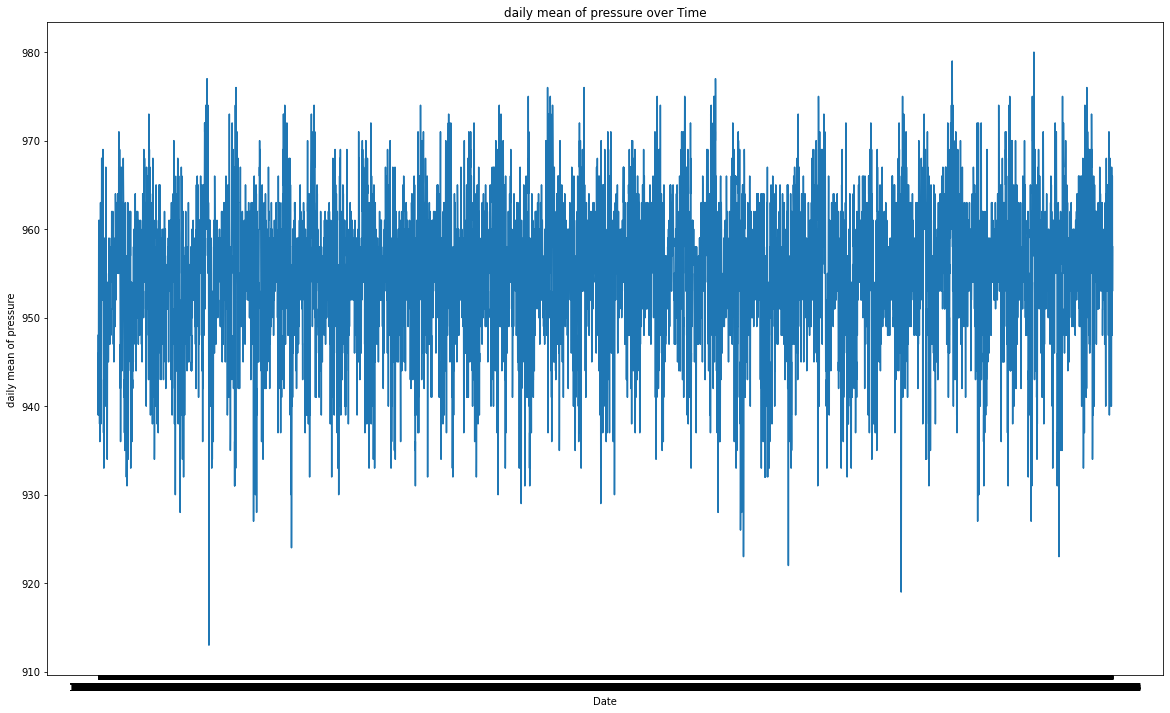

In [33]:
plt.figure(figsize=(20,12))
sns.lineplot(data=dfN,x='UPDATED_DATE',y='PM')
plt.xlabel("Date")
plt.ylabel("daily mean of pressure")
plt.title("daily mean of pressure over Time")
plt.show()

<Figure size 1080x1080 with 0 Axes>

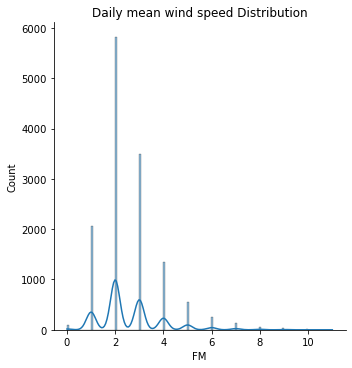

In [34]:
plt.figure(figsize=(15,15))
sns.displot(dfN['FM'],kde=True)
plt.title('Daily mean wind speed Distribution')
plt.show()

<Figure size 1080x1080 with 0 Axes>

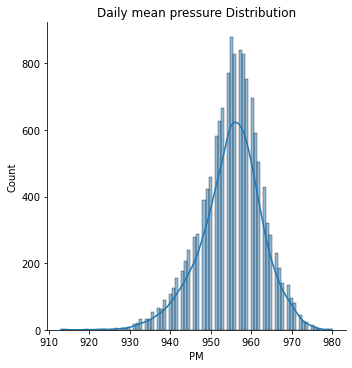

In [35]:
plt.figure(figsize=(15,15))
sns.displot(dfN['PM'],kde=True)
plt.title('Daily mean pressure Distribution')
plt.show()

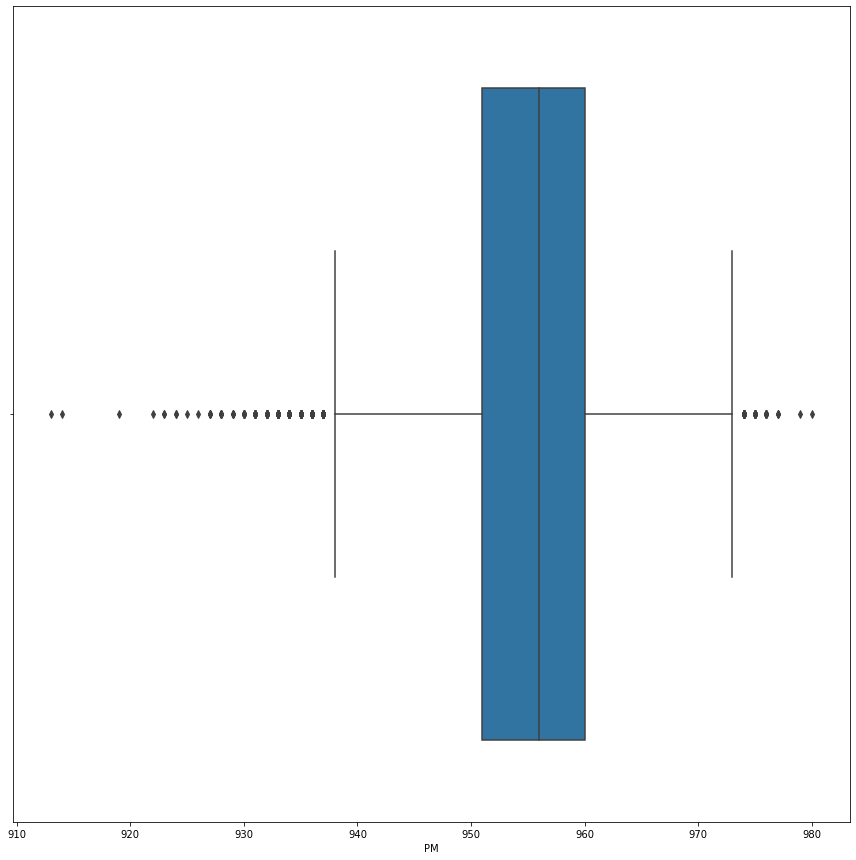

In [36]:
plt.figure(figsize=(15,15))
sns.boxplot(x = dfN["PM"])
plt.show()

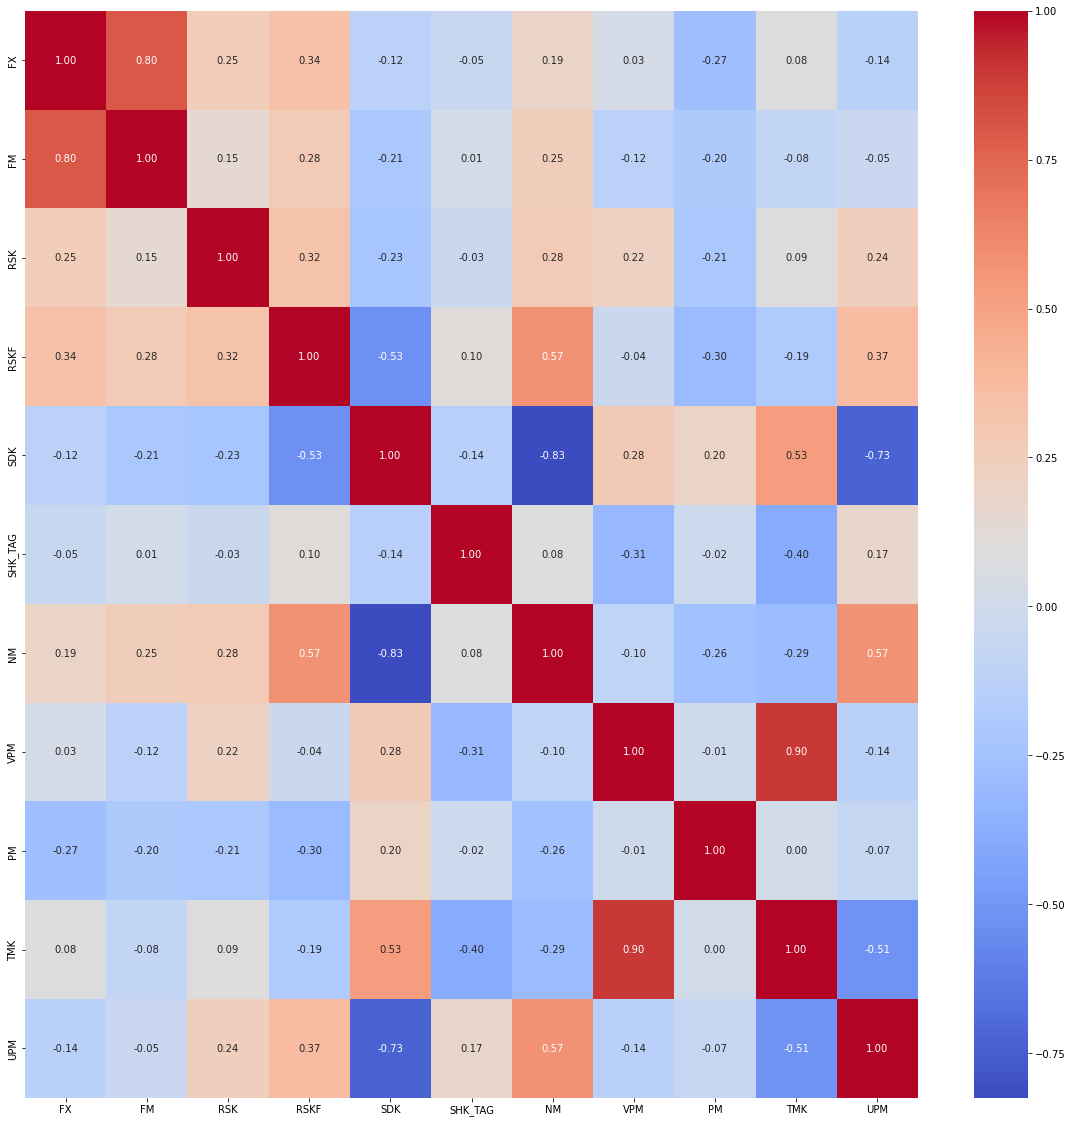

In [37]:
numeric_df = dfN.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix,annot=True,cmap = 'coolwarm', fmt = ".2f")
plt.show()

In [41]:
f = dfN.copy().drop(columns=['UPDATED_DATE','PM']).columns.tolist()

In [42]:
print(f)

['FX', 'FM', 'RSK', 'RSKF', 'SDK', 'SHK_TAG', 'NM', 'VPM', 'TMK', 'UPM']


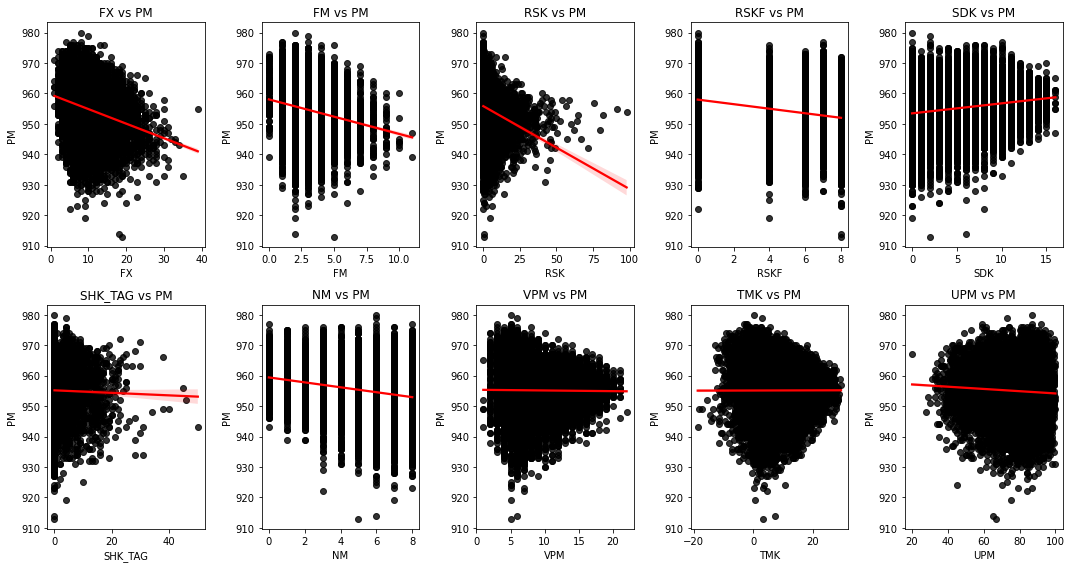

In [45]:
fig, axes = plt.subplots(2,5,figsize=(15,8))
axes =axes.flatten()
for i, feature in enumerate(f):
    sns.regplot(x=feature, y=dfN['PM'],data=dfN,ax = axes[i],scatter_kws={"color":"black"},line_kws={"color":"red"})
    axes[i].set_title(f"{feature} vs PM")
plt.tight_layout()
plt.show()

In [47]:
from statsmodels.graphics.tsaplots import plot_pacf

C:\Users\Maclan\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


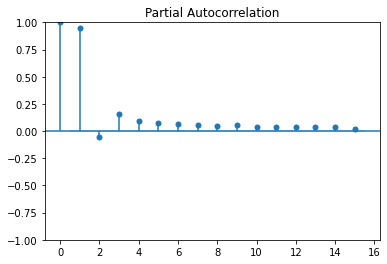

In [48]:
plot_pacf(data['TMK'],lags = 15)
plt.show()

In [49]:
dfN['TMK_LAG']=dfN['TMK'].shift(1)

C:\Users\Maclan\AppData\Local\Temp\ipykernel_1392\926323983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfN['TMK_LAG']=dfN['TMK'].shift(1)


In [50]:
dfN = dfN.dropna()